In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 

In [36]:
import pandas as pd
import numpy as np
import sqlite3
import os
import re
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve,auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#import seaborn as sn
import statistics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import operator
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime

In [34]:
def get_lift_gain(X_test, y_test, model):
    X_test_copy = X_test.copy()

    X_test_copy = pd.DataFrame(X_test_copy)
    X_test_copy['ACCEPT_INDICATOR'] = list(y_test)
    X_test_copy['ACCEPT_PREDICTED_CONFIDENCE'] = model.predict_proba(X_test)[:,1]

    X_test_copy = X_test_copy.sort_values(by='ACCEPT_PREDICTED_CONFIDENCE', axis=0, ascending=False)
    avg_acceptance_rate = y_test[y_test==1].shape[0]/y_test.shape[0]

    deciles = np.array_split(X_test_copy,10)

    percent_correct = []

    total_positive = X_test_copy[X_test_copy['ACCEPT_INDICATOR']==1].shape[0]

    for i in range(10):
        valueCounts = deciles[i]['ACCEPT_INDICATOR'].value_counts()
        if 1 in valueCounts.index:
            percent_correct.append(valueCounts[1]/total_positive)
        else:
            percent_correct.append(0)

    model_cum_percent_correct = []
    x = 0

    for val in percent_correct:
        x = x + val
        model_cum_percent_correct.append(x)

    baseline = [val/10 for val in range(1,11,1)]


    model_lift = []

    for a,b in zip(model_cum_percent_correct, baseline):
        model_lift.append((a/b)*100)
    return model_cum_percent_correct, model_lift



In [47]:
df = pd.read_csv('C:/Users/DebasishGuha/DG/Personal/MTech/Sem4/Project/work/DataFiles/cluster_output/Customer_Classification_Data.csv')

target = df['ACCEPT_INDICATOR']

In [48]:
df_offer = df['OFFER_ID']

In [49]:
df_offer.head()

0    3
1    4
2    6
3    8
4    9
Name: OFFER_ID, dtype: int64

In [50]:
df = df[['CUSTOMER_ID','ACCEPT_INDICATOR','TOTAL_USAGE_SUM','MIN_DAILY_USAGE_MIN','MAX_DAILY_USAGE_MAX','CURRENT_RATE_BILL_AMOUNT_MEAN',
         'PROFIT_MEAN','MEAN_TM_RPR','NBR_AR_UPGR','NBR_CPLN_OPN','NBR_CPLN_CLS',
         'EDUCATION_ID','LIFESTYLE_CATEGORY_ID','FAMILY_CYCLE_ID','SOCIAL_CLASS_ID','AGE_GROUP_ID','INCOME_LEVEL_ID']]

df = pd.get_dummies(df,columns=['EDUCATION_ID', 'LIFESTYLE_CATEGORY_ID', 'FAMILY_CYCLE_ID', 'SOCIAL_CLASS_ID',
                                        'AGE_GROUP_ID', 'INCOME_LEVEL_ID'])

In [51]:
df.head()

,CUSTOMER_ID,ACCEPT_INDICATOR,TOTAL_USAGE_SUM,MIN_DAILY_USAGE_MIN,MAX_DAILY_USAGE_MAX,CURRENT_RATE_BILL_AMOUNT_MEAN,PROFIT_MEAN,MEAN_TM_RPR,NBR_AR_UPGR,NBR_CPLN_OPN,...,AGE_GROUP_ID_7,AGE_GROUP_ID_8,AGE_GROUP_ID_9,AGE_GROUP_ID_10,INCOME_LEVEL_ID_0,INCOME_LEVEL_ID_1,INCOME_LEVEL_ID_2,INCOME_LEVEL_ID_3,INCOME_LEVEL_ID_4,INCOME_LEVEL_ID_5
0,1,0,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,...,0,0,0,0,0,0,1,0,0,0


In [53]:
df_preproc = pd.concat([df,df_offer],axis=1)

In [55]:
df_preproc.to_csv('C:/Users/DebasishGuha/DG/Personal/MTech/Sem4/Project/work/DataFiles/cluster_output/Customer_Classification_Data_preprocessed_offer_id.csv',index = False)

In [18]:
df = df[['TOTAL_USAGE_SUM','MIN_DAILY_USAGE_MIN','MAX_DAILY_USAGE_MAX','CURRENT_RATE_BILL_AMOUNT_MEAN',
         'PROFIT_MEAN','MEAN_TM_RPR','NBR_AR_UPGR','NBR_CPLN_OPN','NBR_CPLN_CLS',
         'EDUCATION_ID','LIFESTYLE_CATEGORY_ID','FAMILY_CYCLE_ID','SOCIAL_CLASS_ID','AGE_GROUP_ID','INCOME_LEVEL_ID']]

df = pd.get_dummies(df,columns=['EDUCATION_ID', 'LIFESTYLE_CATEGORY_ID', 'FAMILY_CYCLE_ID', 'SOCIAL_CLASS_ID',
                                        'AGE_GROUP_ID', 'INCOME_LEVEL_ID'])


X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)


In [ ]:
df_preproc = pd.concat([df,df_offer],axis=1)

In [28]:
df.to_csv('C:/Users/DebasishGuha/DG/Personal/MTech/Sem4/Project/work/DataFiles/cluster_output/Customer_Classification_Data_preprocessed.csv',index = False)

In [12]:
X_train.head()

,TOTAL_USAGE_SUM,MIN_DAILY_USAGE_MIN,MAX_DAILY_USAGE_MAX,CURRENT_RATE_BILL_AMOUNT_MEAN,PROFIT_MEAN,MEAN_TM_RPR,NBR_AR_UPGR,NBR_CPLN_OPN,NBR_CPLN_CLS,EDUCATION_ID_0,...,AGE_GROUP_ID_7,AGE_GROUP_ID_8,AGE_GROUP_ID_9,AGE_GROUP_ID_10,INCOME_LEVEL_ID_0,INCOME_LEVEL_ID_1,INCOME_LEVEL_ID_2,INCOME_LEVEL_ID_3,INCOME_LEVEL_ID_4,INCOME_LEVEL_ID_5
3403,5843.73,9.78,30.32,101.591667,-1.767750,3.22,4.240905,3,1,0,...,0,0,0,1,0,0,0,1,0,0
843,14310.25,21.69,67.24,205.666667,-14.281333,2.03,2.001195,3,0,1,...,0,0,0,0,0,0,0,0,1,0
2580,12595.44,21.45,63.84,197.916667,-0.267500,2.89,3.421350,2,3,0,...,0,0,0,0,0,0,0,0,0,1
4096,15074.41,29.26,68.04,224.666667,-4.204167,2.76,6.639567,2,2,0,...,0,0,0,0,0,0,0,1,0,0
3366,13106.63,23.80,60.88,198.666667,20.016667,2.08,6.079044,3,2,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df = pd.read_csv('C:/Users/DebasishGuha/DG/Personal/MTech/Sem4/Project/work/DataFiles/cluster_output/Customer_Classification_Data_preprocessed.csv')

target = df['ACCEPT_INDICATOR']
df_trn = df.loc[:,~df.columns.isin(['CUSTOMER_ID','ACCEPT_INDICATOR'])]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_trn, target, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
df_trn.head()

,TOTAL_USAGE_SUM,MIN_DAILY_USAGE_MIN,MAX_DAILY_USAGE_MAX,CURRENT_RATE_BILL_AMOUNT_MEAN,PROFIT_MEAN,MEAN_TM_RPR,NBR_AR_UPGR,NBR_CPLN_OPN,NBR_CPLN_CLS,EDUCATION_ID_0,...,AGE_GROUP_ID_7,AGE_GROUP_ID_8,AGE_GROUP_ID_9,AGE_GROUP_ID_10,INCOME_LEVEL_ID_0,INCOME_LEVEL_ID_1,INCOME_LEVEL_ID_2,INCOME_LEVEL_ID_3,INCOME_LEVEL_ID_4,INCOME_LEVEL_ID_5
0,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5055.71,10.86,20.09,77.225,6.42,2.48,5.417033,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Running a Decision Tree  Model :


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=80, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Time taken:  0:00:10
ROC_AUC score for Decision Tree: 0.5038190818733805
[0.13725490196078433, 0.2254901960784314, 0.3169934640522876, 0.3823529411764706, 0.4901960784313726, 0.5751633986928105, 0.6960784313725491, 0.803921568627451, 0.911764705882353, 1.0]
Accuracy: 0.6558044806517311
Precision: 0.3918918918918919
Recall: 0.1895424836601307
F1 Score: 0.2555066079295154


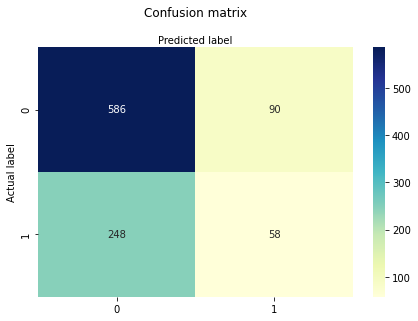

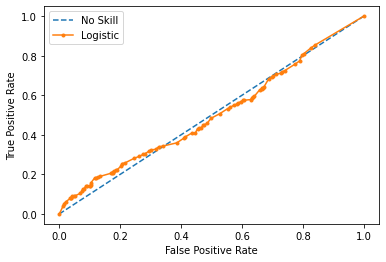

Logistic: f1=0.256 auc=0.354


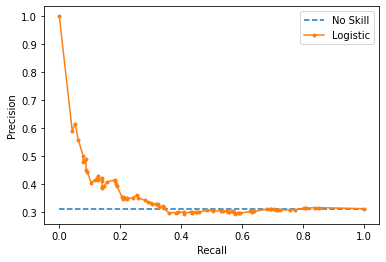

Running a Random Forest  Model :


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Time taken:  0:02:16
ROC_AUC score for Decision Tree: 0.5098619329388561
[0.09477124183006536, 0.21241830065359477, 0.3006535947712418, 0.39215686274509803, 0.5392156862745098, 0.6176470588235294, 0.6993464052287582, 0.7973856209150327, 0.9019607843137255, 1.0]
Accuracy: 0.6883910386965377
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


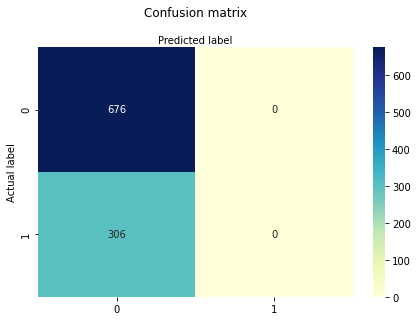

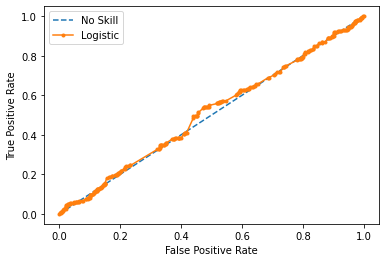

Logistic: f1=0.000 auc=0.324


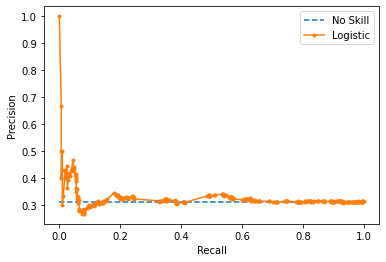

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.1)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.4886877828054299
[0.10130718954248366, 0.19281045751633985, 0.2973856209150327, 0.4117647058823529, 0.4869281045751634, 0.5784313725490196, 0.6862745098039216, 0.7875816993464052, 0.8986928104575163, 0.9999999999999999]
Accuracy: 0.6191446028513238
Precision: 0.2976190476190476
Recall: 0.16339869281045752
F1 Score: 0.2109704641350211


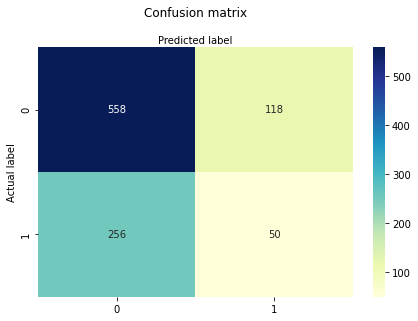

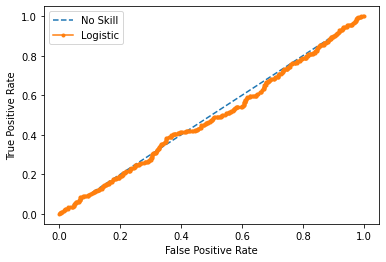

Logistic: f1=0.211 auc=0.309


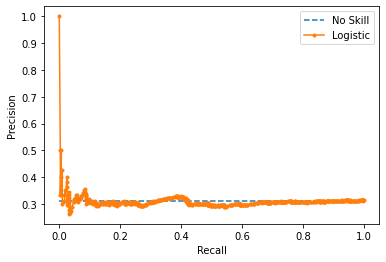

Running a Logistic Regression  Model :


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.495272073326372
[0.1111111111111111, 0.19607843137254902, 0.3006535947712418, 0.3790849673202614, 0.5098039215686274, 0.5915032679738562, 0.6764705882352942, 0.7843137254901962, 0.9019607843137256, 1.0000000000000002]
Accuracy: 0.6883910386965377
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


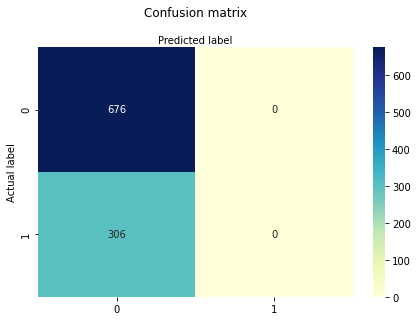

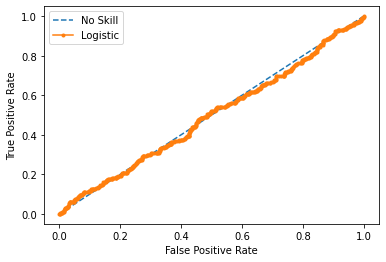

Logistic: f1=0.000 auc=0.316


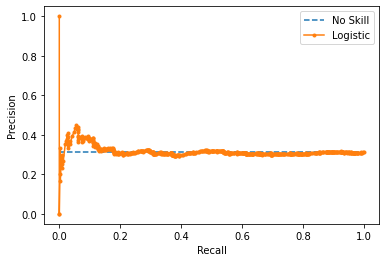

Running a Neural Network  Model :


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 1), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Time taken:  0:02:35
ROC_AUC score for Decision Tree: 0.5056512743164326
[0.1437908496732026, 0.20588235294117646, 0.3137254901960784, 0.39869281045751637, 0.47058823529411764, 0.5882352941176471, 0.6797385620915033, 0.8006535947712419, 0.9150326797385622, 1.0]
Accuracy: 0.6283095723014257
Precision: 0.3314285714285714
Recall: 0.1895424836601307
F1 Score: 0.24116424116424115


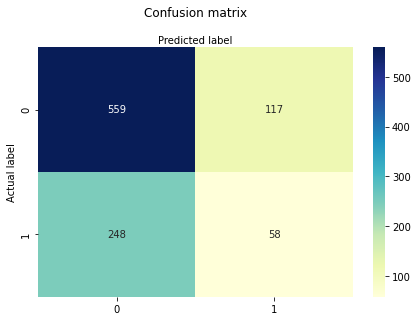

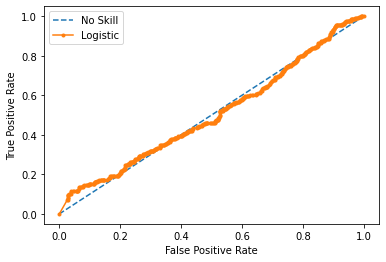

Logistic: f1=0.241 auc=0.363


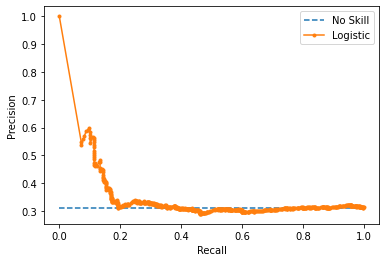

In [46]:
if __name__ == '__main__':
    scores = []
    model_config = [{"model":"Decision Tree",
                     "parameters":{'max_depth':[10,20,30,40,50,60,70,80,90,100],
                                   'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]},
                    "skip":"Y"},
                    {"model": "Random Forest",
                     "parameters": {'max_depth':[10, 20, 30, 40, 50],
                                    'n_estimators':[10, 20, 30, 40, 50],
                                    'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]},
                    "skip":"Y"},
                    {"model": "Naive Bayes",
                     "parameters": {'var_smoothing':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}},
                    {"model": "Logistic Regression",
                     "parameters": {'penalty':['l1','l2'], 'C':[1, 0.1, 0.01, 0.001]}},
                    {"model": "Neural Network",
                     "parameters": {'hidden_layer_sizes':[(10, 1), (100, 1)], 'learning_rate':['constant', 'invscaling', 'adaptive']},
                    "skip":"Y"}
                    ]

    for model in model_config:
        if model.get('skip','N')=='Y':
            continue
        if model.get('model') == 'Decision Tree':
            model_run = DecisionTreeClassifier()
        if model.get('model') == 'Random Forest':
            model_run = RandomForestClassifier()
        if model.get('model') == 'Naive Bayes':
            model_run = GaussianNB()
        if model.get('model') == 'Logistic Regression':
            model_run = LogisticRegression(solver='liblinear', max_iter=1000)
        if model.get('model') == 'Neural Network':
            model_run = MLPClassifier()

        print('Running a',model.get('model'), ' Model :\n\n')
        start_time = datetime.datetime.now()
    #parameters = {'max_depth':[d for d in range(10,110,10)], 'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}
    #decision_tree = DecisionTreeClassifier()
    #grid = GridSearchCV(decision_tree, parameters, cv=5, scoring='roc_auc')
        parameters = model.get('parameters')
        grid = GridSearchCV(model_run, parameters, cv=5, scoring='roc_auc')
        grid.fit(X_train,y_train)

        #decision_tree = grid.best_estimator_
        #print(decision_tree)
        model_run = grid.best_estimator_
        print(model_run)
        end_time = datetime.datetime.now()
        print("Time taken: ",str(datetime.timedelta(seconds=(end_time - start_time).seconds)))
        # decision_tree_score = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])
        # print('ROC_AUC score for Decision Tree:', decision_tree_score)
        # scores.append(decision_tree_score)
        #
        # a, b = get_lift_gain(X_test, y_test, decision_tree)

        model_score = roc_auc_score(y_test, model_run.predict_proba(X_test)[:,1])
        print('ROC_AUC score for Decision Tree:', model_score)
        scores.append(model_score)


        a, b = get_lift_gain(X_test, y_test, model_run)

        print(a)

        # Begin Plot Confusion Matrix
        y_pred = model_run.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap

        # Accuracy, Precision, Recall
        print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
        print("Precision:", metrics.precision_score(y_test, y_pred))
        print("Recall:", metrics.recall_score(y_test, y_pred))
        print("F1 Score:", metrics.f1_score(y_test, y_pred))



        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

        



        # calculate roc curves
        ns_probs = [0 for _ in range(len(y_test))]
        lr_probs = model_run.predict_proba(X_test)
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_probs = lr_probs[:, 1]
        lr_auc = roc_auc_score(y_test, lr_probs)
        
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
        # plot the roc curve for the model
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()
        
        
        
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
        lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
        # summarize scores
        print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
        # plot the precision-recall curves
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.0001)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5559588626739262
[0.10526315789473684, 0.2631578947368421, 0.39473684210526316, 0.4736842105263158, 0.5789473684210527, 0.6842105263157895, 0.7105263157894737, 0.868421052631579, 0.8947368421052632, 1.0]
Accuracy: 0.552
Precision: 0.3392857142857143
Recall: 0.5
F1 Score: 0.4042553191489362


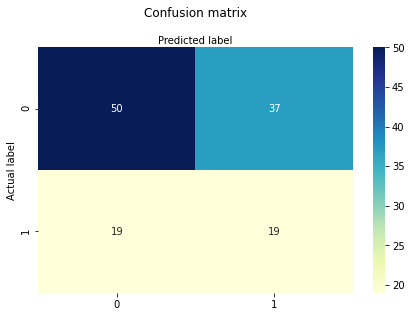

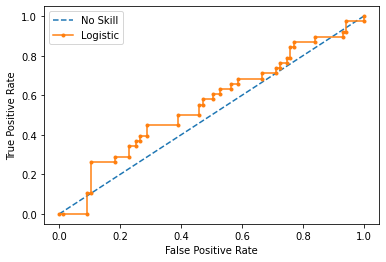

Logistic: f1=0.404 auc=0.337


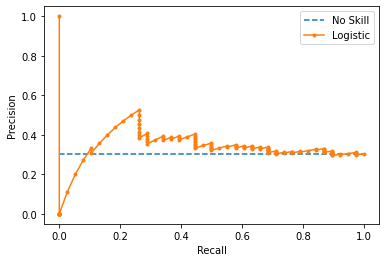

Running a Logistic Regression  Model :


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5184513006654567
[0.13157894736842105, 0.18421052631578946, 0.23684210526315788, 0.42105263157894735, 0.5, 0.631578947368421, 0.763157894736842, 0.8684210526315789, 0.9736842105263157, 0.9999999999999999]
Accuracy: 0.544
Precision: 0.21212121212121213
Recall: 0.18421052631578946
F1 Score: 0.1971830985915493


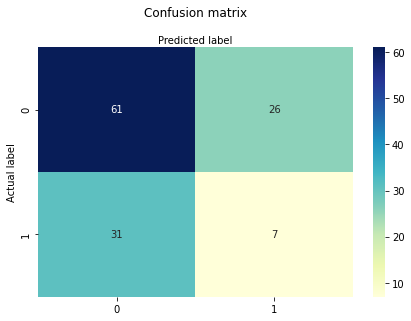

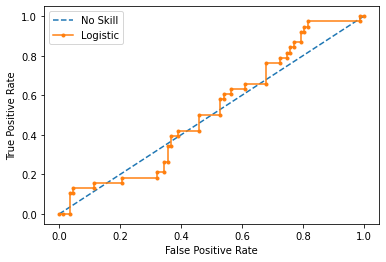

Logistic: f1=0.197 auc=0.315


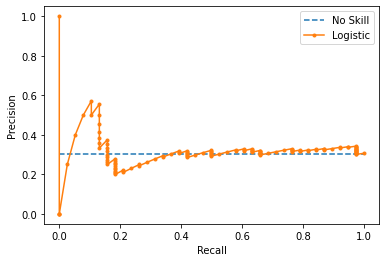

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=1e-05)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5456043956043956
[0.14285714285714285, 0.2571428571428571, 0.34285714285714286, 0.45714285714285713, 0.5142857142857142, 0.6285714285714286, 0.7142857142857143, 0.8857142857142857, 0.9428571428571428, 1.0]
Accuracy: 0.4028776978417266
Precision: 0.26
Recall: 0.7428571428571429
F1 Score: 0.3851851851851852


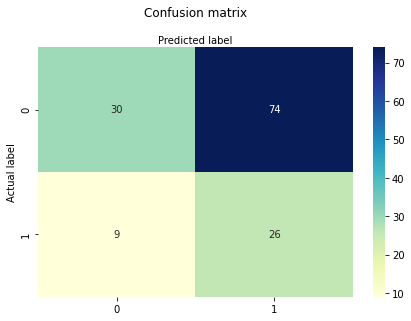

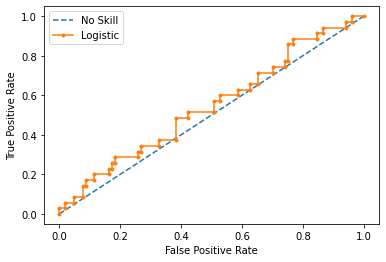

Logistic: f1=0.385 auc=0.308


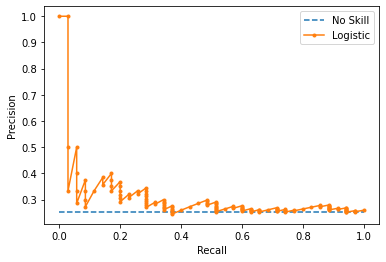

Running a Logistic Regression  Model :


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5302197802197801
[0.14285714285714285, 0.19999999999999998, 0.34285714285714286, 0.4285714285714286, 0.5428571428571429, 0.6285714285714287, 0.742857142857143, 0.8000000000000002, 0.8857142857142859, 1.0000000000000002]
Accuracy: 0.7266187050359713
Precision: 0.38461538461538464
Recall: 0.14285714285714285
F1 Score: 0.20833333333333331


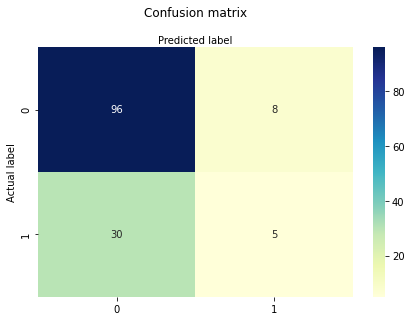

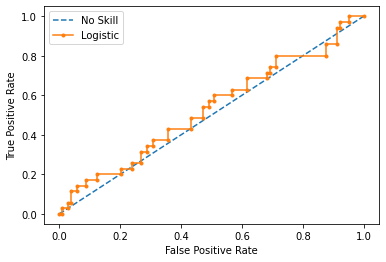

Logistic: f1=0.208 auc=0.283


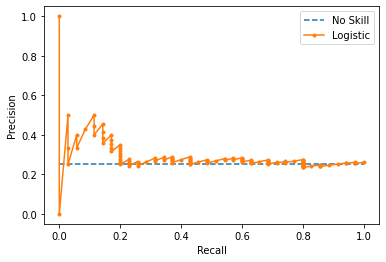

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=1e-09)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.6285714285714286
[0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142, 0.857142857142857, 0.857142857142857, 0.857142857142857, 0.9999999999999998, 0.9999999999999998]
Accuracy: 0.19540229885057472
Precision: 0.08
Recall: 0.8571428571428571
F1 Score: 0.14634146341463417


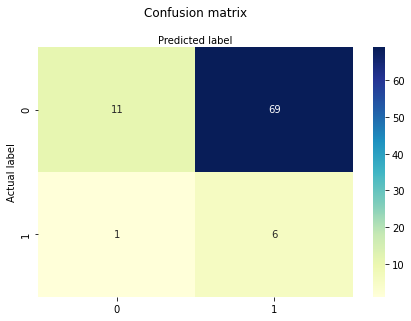

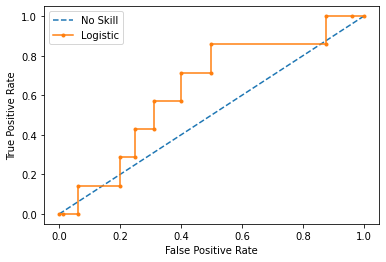

Logistic: f1=0.146 auc=0.104


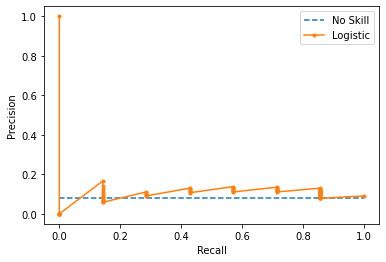

Running a Logistic Regression  Model :


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.6410714285714285
[0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142, 0.857142857142857, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998]
Accuracy: 0.9195402298850575
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


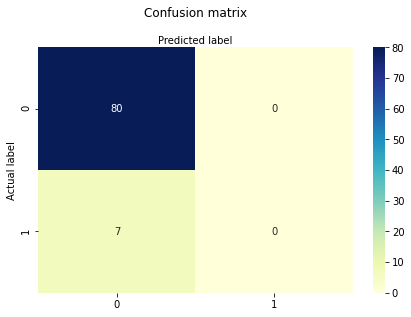

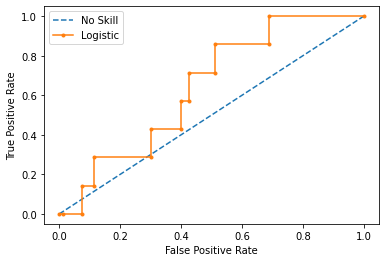

Logistic: f1=0.000 auc=0.106


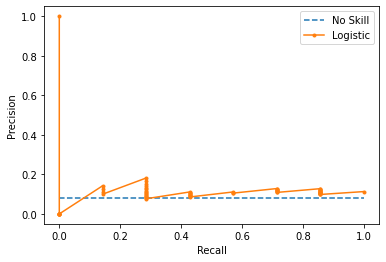

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.1)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5071996027805362
[0.10526315789473684, 0.18421052631578946, 0.2894736842105263, 0.42105263157894735, 0.5526315789473684, 0.6842105263157894, 0.7105263157894736, 0.763157894736842, 0.9473684210526315, 1.0]
Accuracy: 0.5763888888888888
Precision: 0.24444444444444444
Recall: 0.2894736842105263
F1 Score: 0.26506024096385544


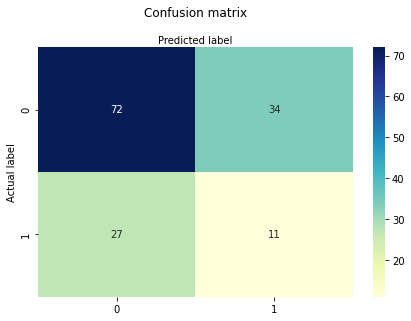

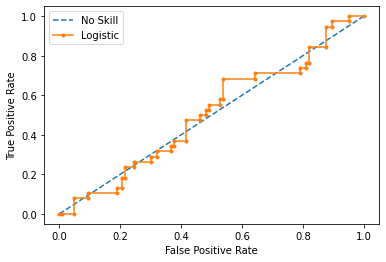

Logistic: f1=0.265 auc=0.258


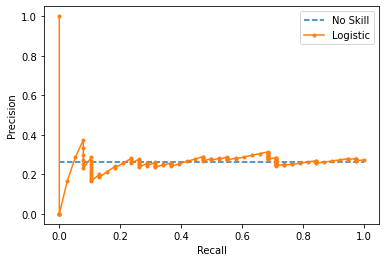

Running a Logistic Regression  Model :


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5558589870903674
[0.07894736842105263, 0.2894736842105263, 0.39473684210526316, 0.4473684210526316, 0.5526315789473684, 0.6842105263157894, 0.7894736842105262, 0.8157894736842104, 0.9210526315789472, 0.9999999999999999]
Accuracy: 0.7361111111111112
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


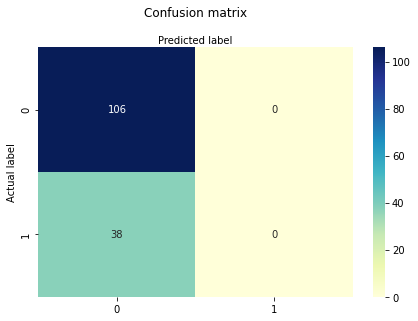

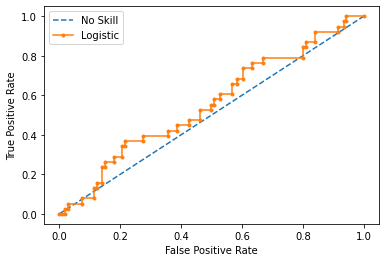

Logistic: f1=0.000 auc=0.293


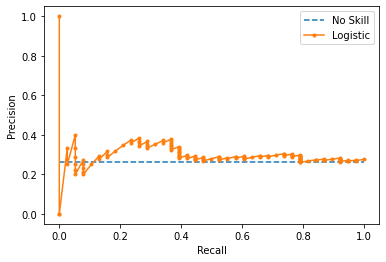

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.0001)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.385896527285613
[0.029411764705882353, 0.08823529411764705, 0.1764705882352941, 0.2647058823529412, 0.38235294117647056, 0.5294117647058824, 0.7058823529411765, 0.7941176470588236, 0.8823529411764707, 1.0]
Accuracy: 0.41025641025641024
Precision: 0.21311475409836064
Recall: 0.38235294117647056
F1 Score: 0.27368421052631575


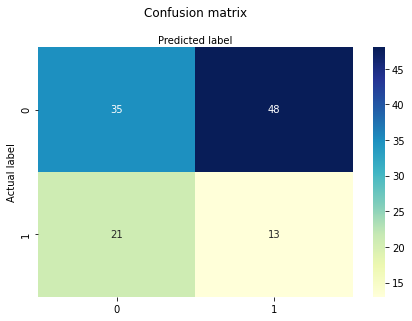

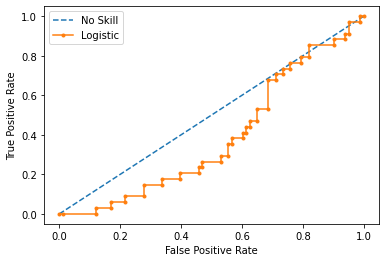

Logistic: f1=0.274 auc=0.224


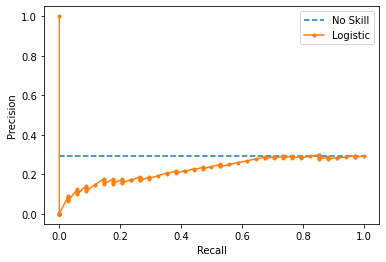

Running a Logistic Regression  Model :


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5
[0.14705882352941177, 0.23529411764705882, 0.3235294117647059, 0.411764705882353, 0.5294117647058824, 0.7352941176470589, 0.7941176470588236, 0.8823529411764707, 0.9705882352941178, 1.0]
Accuracy: 0.7094017094017094
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


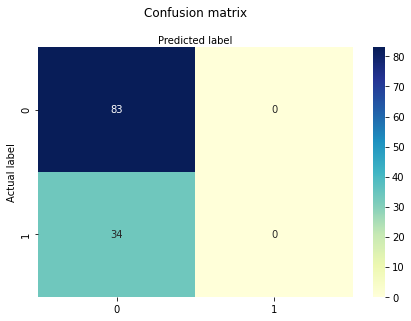

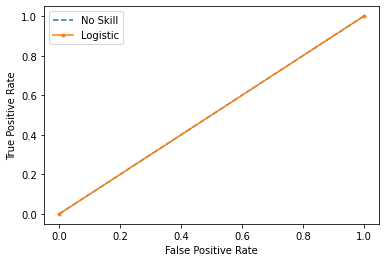

Logistic: f1=0.000 auc=0.645


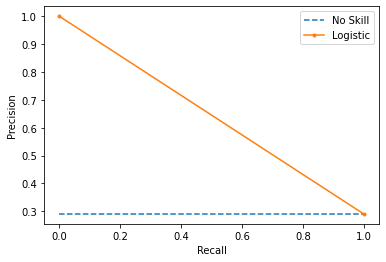

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.001)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.6502325581395348
[0.2, 0.28, 0.4, 0.48000000000000004, 0.68, 0.8800000000000001, 0.9200000000000002, 0.9600000000000002, 0.9600000000000002, 1.0000000000000002]
Accuracy: 0.4864864864864865
Precision: 0.2948717948717949
Recall: 0.92
F1 Score: 0.44660194174757284


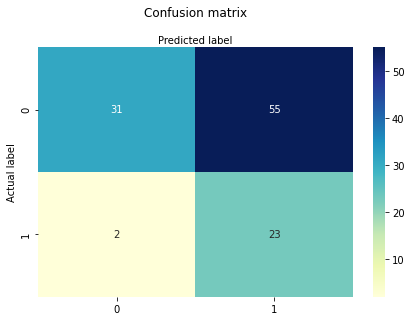

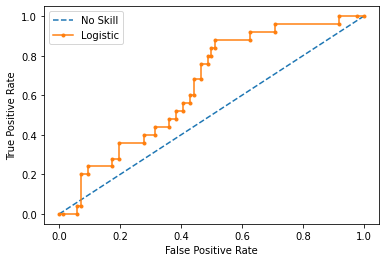

Logistic: f1=0.447 auc=0.295


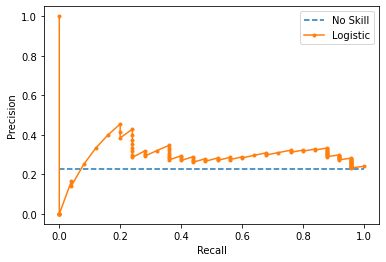

Running a Logistic Regression  Model :


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:02
ROC_AUC score for Decision Tree: 0.4744186046511628
[0.16, 0.28, 0.4, 0.4, 0.44, 0.52, 0.6, 0.6799999999999999, 0.84, 1.0]
Accuracy: 0.7747747747747747
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


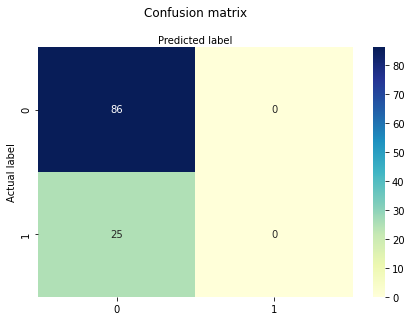

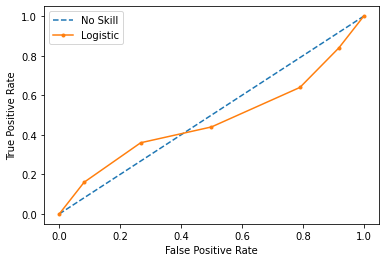

Logistic: f1=0.000 auc=0.307


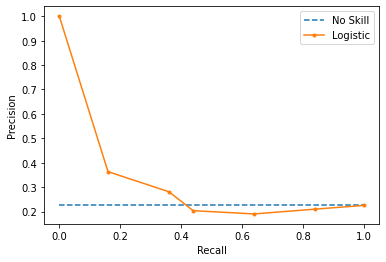

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.01)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5277777777777778
[0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0, 1.0]
Accuracy: 0.5384615384615384
Precision: 0.3333333333333333
Recall: 0.5
F1 Score: 0.4


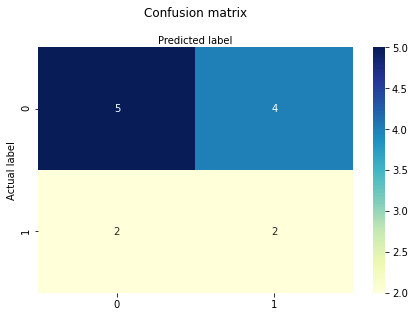

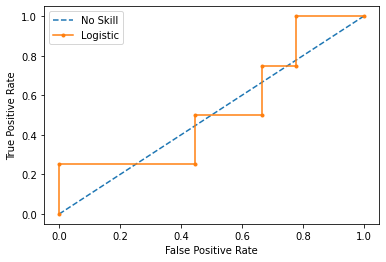

Logistic: f1=0.400 auc=0.473


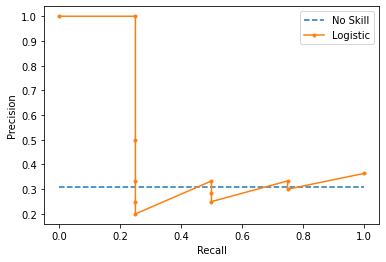

Running a Logistic Regression  Model :


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.4722222222222222
[0.25, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0, 1.0]
Accuracy: 0.6923076923076923
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


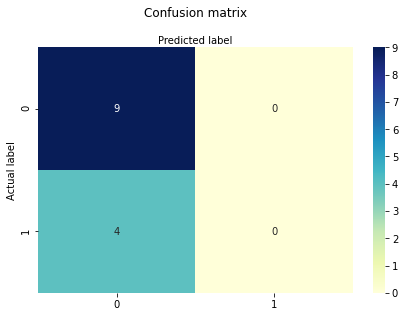

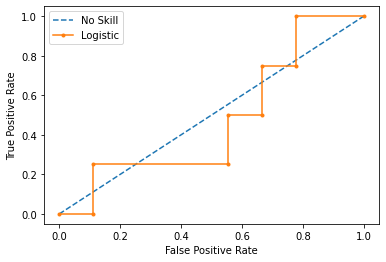

Logistic: f1=0.000 auc=0.275


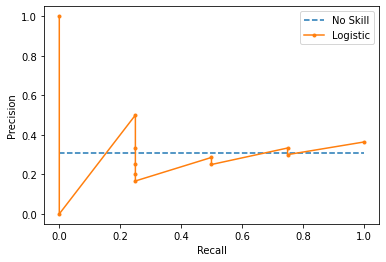

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.1)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5229044834307992
[0.07894736842105263, 0.21052631578947367, 0.3421052631578947, 0.4736842105263157, 0.5263157894736841, 0.6578947368421051, 0.7631578947368419, 0.8157894736842104, 0.894736842105263, 0.9999999999999999]
Accuracy: 0.589041095890411
Precision: 0.28
Recall: 0.3684210526315789
F1 Score: 0.3181818181818182


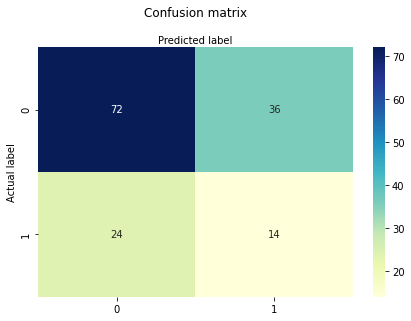

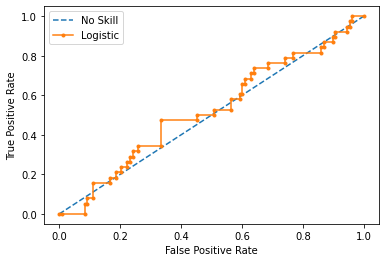

Logistic: f1=0.318 auc=0.264


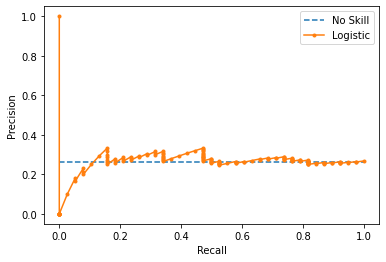

Running a Logistic Regression  Model :


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5760233918128654
[0.15789473684210525, 0.2894736842105263, 0.4736842105263158, 0.5263157894736843, 0.6315789473684211, 0.736842105263158, 0.7894736842105263, 0.8157894736842105, 0.868421052631579, 1.0]
Accuracy: 0.7397260273972602
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


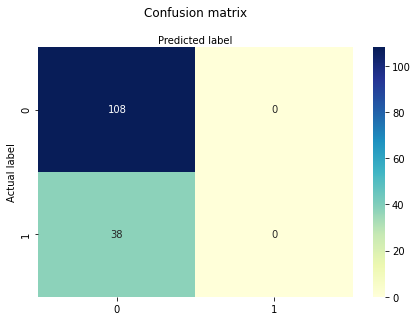

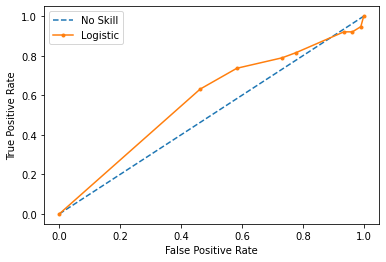

Logistic: f1=0.000 auc=0.522


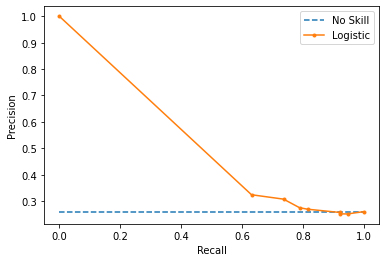

Running a Naive Bayes  Model :


GaussianNB(priors=None, var_smoothing=0.1)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5599078341013825
[0.16666666666666666, 0.30952380952380953, 0.38095238095238093, 0.40476190476190477, 0.5238095238095238, 0.6190476190476191, 0.7380952380952381, 0.8571428571428572, 0.9285714285714286, 1.0]
Accuracy: 0.5961538461538461
Precision: 0.5
Recall: 0.38095238095238093
F1 Score: 0.4324324324324324


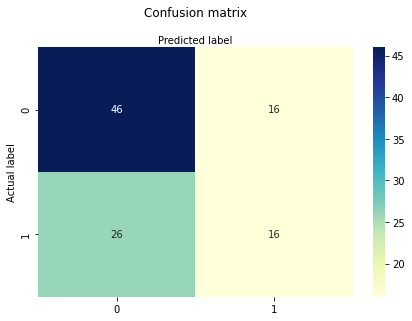

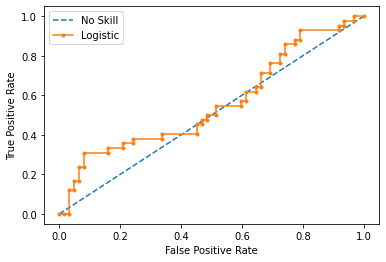

Logistic: f1=0.432 auc=0.482


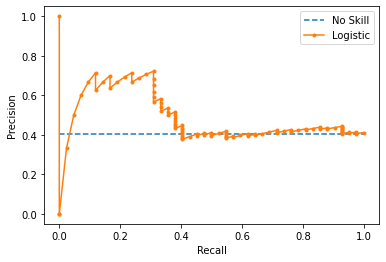

Running a Logistic Regression  Model :


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Time taken:  0:00:00
ROC_AUC score for Decision Tree: 0.5303379416282642
[0.11904761904761904, 0.23809523809523808, 0.3571428571428571, 0.4285714285714285, 0.5476190476190476, 0.6428571428571428, 0.7619047619047619, 0.8571428571428571, 0.9047619047619047, 0.9999999999999999]
Accuracy: 0.5673076923076923
Precision: 0.42105263157894735
Recall: 0.19047619047619047
F1 Score: 0.26229508196721313


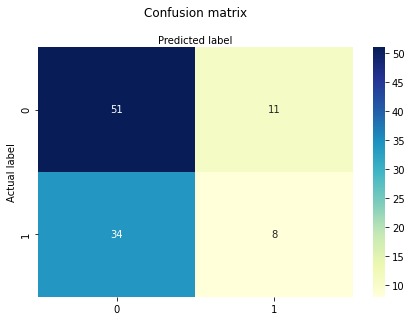

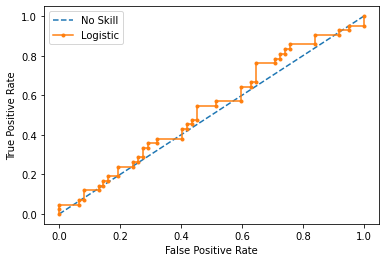

Logistic: f1=0.262 auc=0.448


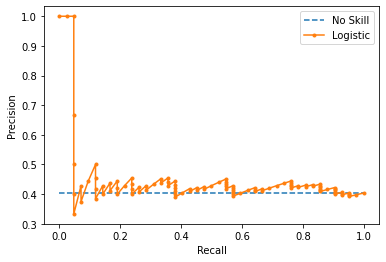

In [59]:
if __name__ == '__main__':
    scores = []
    model_config = [{"model":"Decision Tree",
                     "parameters":{'max_depth':[10,20,30,40,50,60,70,80,90,100],
                                   'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]},
                    "skip":"Y"},
                    {"model": "Random Forest",
                     "parameters": {'max_depth':[10, 20, 30, 40, 50],
                                    'n_estimators':[10, 20, 30, 40, 50],
                                    'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]},
                    "skip":"Y"},
                    {"model": "Naive Bayes",
                     "parameters": {'var_smoothing':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}},
                    {"model": "Logistic Regression",
                     "parameters": {'penalty':['l1','l2'], 'C':[1, 0.1, 0.01, 0.001]}},
                    {"model": "Neural Network",
                     "parameters": {'hidden_layer_sizes':[(10, 1), (100, 1)], 'learning_rate':['constant', 'invscaling', 'adaptive']},
                    "skip":"Y"}
                    ]

    for i in range(9):
        df = df_preproc[df_preproc['OFFER_ID']==i+1].copy()
        target = df['ACCEPT_INDICATOR']
        df_trn = df.loc[:,~df.columns.isin(['CUSTOMER_ID','ACCEPT_INDICATOR'])]

        X_train, X_test, y_train, y_test = train_test_split(df_trn, target, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for model in model_config:
            if model.get('skip','N')=='Y':
                continue
            if model.get('model') == 'Decision Tree':
                model_run = DecisionTreeClassifier()
            if model.get('model') == 'Random Forest':
                model_run = RandomForestClassifier()
            if model.get('model') == 'Naive Bayes':
                model_run = GaussianNB()
            if model.get('model') == 'Logistic Regression':
                model_run = LogisticRegression(solver='liblinear', max_iter=1000)
            if model.get('model') == 'Neural Network':
                model_run = MLPClassifier()

            print('Running a',model.get('model'), ' Model :\n\n')
            start_time = datetime.datetime.now()
        #parameters = {'max_depth':[d for d in range(10,110,10)], 'min_impurity_decrease':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}
        #decision_tree = DecisionTreeClassifier()
        #grid = GridSearchCV(decision_tree, parameters, cv=5, scoring='roc_auc')
            parameters = model.get('parameters')
            grid = GridSearchCV(model_run, parameters, cv=5, scoring='roc_auc')
            grid.fit(X_train,y_train)

            #decision_tree = grid.best_estimator_
            #print(decision_tree)
            model_run = grid.best_estimator_
            print(model_run)
            end_time = datetime.datetime.now()
            print("Time taken: ",str(datetime.timedelta(seconds=(end_time - start_time).seconds)))
            # decision_tree_score = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])
            # print('ROC_AUC score for Decision Tree:', decision_tree_score)
            # scores.append(decision_tree_score)
            #
            # a, b = get_lift_gain(X_test, y_test, decision_tree)

            model_score = roc_auc_score(y_test, model_run.predict_proba(X_test)[:,1])
            print('ROC_AUC score for Decision Tree:', model_score)
            scores.append(model_score)


            a, b = get_lift_gain(X_test, y_test, model_run)

            print(a)

            # Begin Plot Confusion Matrix
            y_pred = model_run.predict(X_test)
            cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

            class_names = [0, 1]  # name  of classes
            fig, ax = plt.subplots()
            tick_marks = np.arange(len(class_names))
            plt.xticks(tick_marks, class_names)
            plt.yticks(tick_marks, class_names)
            # create heatmap

            # Accuracy, Precision, Recall
            print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
            print("Precision:", metrics.precision_score(y_test, y_pred))
            print("Recall:", metrics.recall_score(y_test, y_pred))
            print("F1 Score:", metrics.f1_score(y_test, y_pred))



            sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
            ax.xaxis.set_label_position("top")
            plt.tight_layout()
            plt.title('Confusion matrix', y=1.1)
            plt.ylabel('Actual label')
            plt.xlabel('Predicted label')
            plt.show()





            # calculate roc curves
            ns_probs = [0 for _ in range(len(y_test))]
            lr_probs = model_run.predict_proba(X_test)
            ns_auc = roc_auc_score(y_test, ns_probs)
            lr_probs = lr_probs[:, 1]
            lr_auc = roc_auc_score(y_test, lr_probs)

            ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
            lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
            # plot the roc curve for the model
            plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
            plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
            # axis labels
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()



            lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
            lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
            # summarize scores
            print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
            # plot the precision-recall curves
            no_skill = len(y_test[y_test==1]) / len(y_test)
            plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
            plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
            # axis labels
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()

In [14]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [15]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.044536,0.018382,0.123256,0.076796,0.415362,0.813333,0.448503,0.6,0.25,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.412126,0.285362,0.462096,0.368404,0.272499,0.020000,0.000000,0.6,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.337674,0.279982,0.430892,0.346689,0.432490,0.593333,0.284387,0.4,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.445303,0.455055,0.469438,0.421640,0.387546,0.506667,0.928837,0.4,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.359869,0.332661,0.403726,0.348791,0.664066,0.053333,0.816592,0.6,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.658381,0.791751,0.518172,0.613571,0.848254,0.513333,0.051440,0.6,0.50,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.050692,0.048195,0.049927,0.081068,0.464799,0.320000,0.748134,0.4,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.291277,0.220354,0.307085,0.258663,0.339169,0.586667,0.266410,0.2,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.270437,0.205335,0.301120,0.272439,0.402677,0.820000,0.277211,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.198141,0.111410,0.318741,0.200990,0.414848,0.060000,0.244034,0.0,0.25,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
